# 6.4 - Regresyon Problemleri ve Lineer Regresyon Modeli: Hedef Değişken ve Özellikler Arasındaki İlişkiyi Anlama

## 1.Yorum ve anlam

$harcamalar = 873 + 0.0012 ∗ yillik\_gelir + 0.00002 ∗ yillik\_gelir^2 − 223.57 ∗ cocuk\_sahibi$

Verilen bağımsız değişkenlerin anlamlı olması ve sonuç değerlerini açıklayabilmesi için, değerlerinin standart sapmasından yüksek, t-testinden gelen p-değerinin belli bir anlamlılık değerinden düşük olması (0.1 veya daha iyi bir sonuç için 0.05) gerekiyor. p-değeri ne kadar düşük olursa, katsayımız o kadar anlamlı olur. <br>

Yukarıdaki fonksiyonu incelediğimizde, "harcamalar", "yıllık gelir" ve "çocuk sahibi" değişkenleriyle açıklanmaktadır.
Bir önceki cevabım olan "'yıllık gelir' değişkeninin, 'harcamalar' üzerindeki etkisinin düşük olduğunu görüyoruz. Ayrıca, bir ailenin dinlenme/eğlence harcamalarını tahmin edebilmek için, yukarıdaki değişkenlerden daha fazlasına ihtiyaç vardır." açıklaması doğru değildir. Örneğin yıllık geliri 24.000$ olan bir ailenin yıllık gelirinin neredeyse yarısı eğlence harcamalarına gitmektedir. Ayrıca 24.000'den 30.000'e çıkan gelir, harcamalar üzerinde de büyük bir artışa sebep olmaktadır. (bkz: yıllık gelir'in karesi ile çarpılması) Dolayısıyla değişkenlerin fazla olmasına gerek olmadan da hedef değişken açıklanabilmekte, katsayıların küçük olması da direkt olarak bir yoruma sahip olmamaktadır.

***
# 2. Hava durumu modeli

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
#import warnings

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
title_font = {"family":"arial", "weight":"bold", "color":"darkred", "size":16}
axis_font = {"family":"serif", "weight":"normal", "color":"darkgreen", "size":14}
# warnings.filterwarnings("ignore")

In [2]:
# %matplotlib inline
# pd.options.display.float_format = '{:.2f}'.format

weather = pd.read_csv("weatherHistory.csv")

weather.insert(3, "Temperature Difference (C)", 
               (weather["Temperature (C)"] - weather["Apparent Temperature (C)"]))

weather.drop(columns = ["Temperature (C)", "Apparent Temperature (C)", "Loud Cover"], inplace = True)

weather.head()

,Formatted Date,Summary,Precip Type,Temperature Difference (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,2.083333,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,2.127778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,0.000000,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,2.344444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,1.777778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


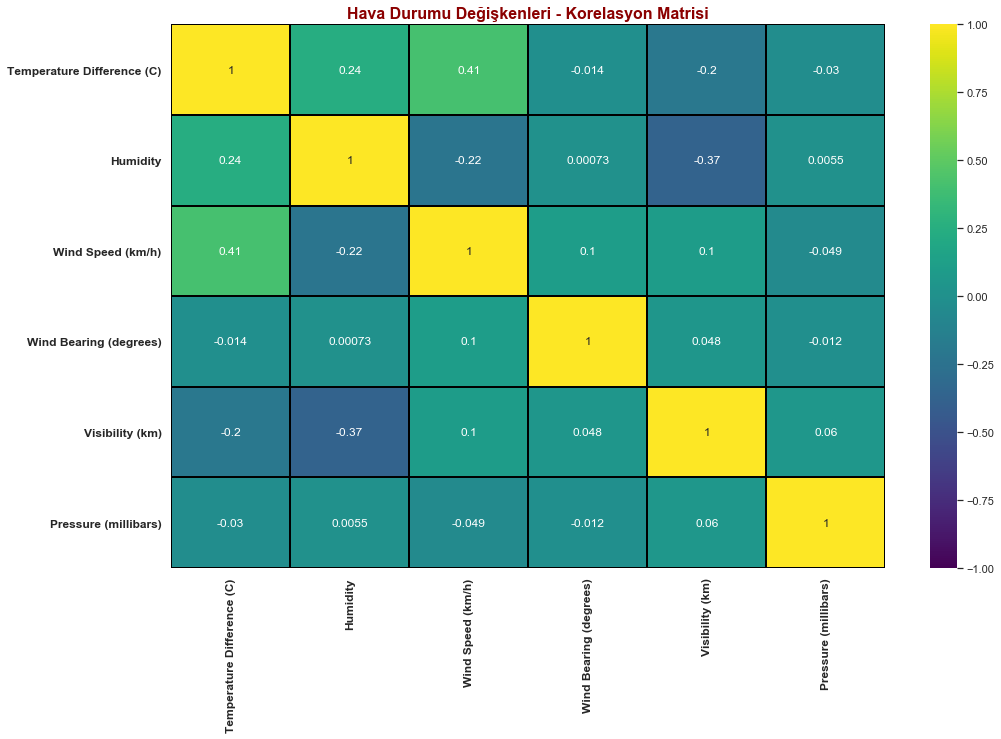

In [3]:
weather_corr = weather.corr()
plt.figure(figsize=(16,10))
ax = sns.heatmap(weather_corr, annot = True, linewidths = 1, linecolor = "black",
            vmin = -1, vmax = 1, cmap = "viridis", mask = None)
plt.xticks(size = 12, weight = "bold", rotation = 90)
plt.yticks(size = 12, weight = "bold")
plt.title("Hava Durumu Değişkenleri - Korelasyon Matrisi", fontdict = title_font)
plt.show()

In [4]:
y1 = weather["Temperature Difference (C)"]
x1 = weather[["Humidity", "Wind Speed (km/h)"]]

x1 = sm.add_constant(x1)
results1_model = sm.OLS(y1, x1)
results1 = results1_model.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Temperature Difference (C)   R-squared:                       0.288
Model:                                    OLS   Adj. R-squared:                  0.288
Method:                         Least Squares   F-statistic:                 1.949e+04
Date:                        Mon, 22 Jun 2020   Prob (F-statistic):               0.00
Time:                                14:09:08   Log-Likelihood:            -1.7046e+05
No. Observations:                       96453   AIC:                         3.409e+05
Df Residuals:                           96450   BIC:                         3.409e+05
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4381      0.021   -115.948      0.000      -2.479      -2.397
Humidity              3.0292      0.024    126.479      0.000       2.982       3.076
Wind Speed (km/h)     0.1193      0.001    176.164      0.000       0.118       0.121
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                           0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# nem ve rüzgar hızı etkileşimi
weather["Humidity x Wind Speed"] = weather.Humidity * weather["Wind Speed (km/h)"]

y1 = weather["Temperature Difference (C)"]
x1_new = weather[["Humidity", "Wind Speed (km/h)", "Humidity x Wind Speed"]]

x1_new = sm.add_constant(x1_new)
results1_model = sm.OLS(y1, x1_new)
results1 = results1_model.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Temperature Difference (C)   R-squared:                       0.341
Model:                                    OLS   Adj. R-squared:                  0.341
Method:                         Least Squares   F-statistic:                 1.666e+04
Date:                        Mon, 22 Jun 2020   Prob (F-statistic):               0.00
Time:                                14:09:08   Log-Likelihood:            -1.6669e+05
No. Observations:                       96453   AIC:                         3.334e+05
Df Residuals:                           96449   BIC:                         3.334e+05
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0839      0.033     -2.511      0.012      -0.149      -0.018
Humidity                 -0.1775      0.043     -4.133      0.000      -0.262      -0.093
Wind Speed (km/h)        -0.0905      0.002    -36.797      0.000      -0.095      -0.086
Humidity x Wind Speed     0.2971      0.003     88.470      0.000       0.291       0.304
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                           0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Yorumlar:
* İlk senaryoda, tahmin edilen katsayılar, istatistiksel olarak anlamlıdır. p değerleri çok düşüktür.
* Bir önceki soruda bulunan **Nem** ve **Rüzgar Hızı** katsayıları sırasıyla **-32.50** ve **-0.20** iken şimdi, **3.03** ve **0.12** olarak bulunmuştur ki bu değerler bir öncekine göre oldukça farklıdır. Bir önceki soruda, sıcaklık üzerindeki en büyük etkiyi **Nem** değişkeni yaparken, şimdiki değer 10 kat düşmüştür.
* Yeni oluşturduğumuz "Nem x Rüzgar Hızı" değişkenini eklediğimiz zaman **Nem** ve **Rüzgar Hızı** katsayılarının işaretleri değişmiş, sabit değer düşmüştür. Katsayılar, istatistiksel olarak anlamlıdır fakat sabit değerin p-değeri, 0.012'ye yükselmiştir.

***
# 3. Ev fiyatları modeli

In [7]:
house = pd.read_csv("house_prices.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
y2 = house["SalePrice"]
x2 = house[["LotArea", "OverallQual", "GarageArea", "YearBuilt", "TotRmsAbvGrd", "YrSold"]]

In [9]:
x2 = sm.add_constant(x2)
results2_model = sm.OLS(y2, x2)
results2 = results2_model.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     663.4
Date:                Mon, 22 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:09:08   Log-Likelihood:                -17581.
No. Observations:                1460   AIC:                         3.518e+04
Df Residuals:                    1453   BIC:                         3.521e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.603e+05   1.63e+06     -0.527      0.598   -4.06e+06    2.34e+06
LotArea          1.0684      0.111      9.610      0.000       0.850       1.286
OverallQual    2.96e+04   1117.993     26.472      0.000    2.74e+04    3.18e+04
GarageArea      66.6873      6.441     10.354      0.000      54.053      79.321
YearBuilt      314.3945     46.170      6.809      0.000     223.827     404.962
TotRmsAbvGrd  1.056e+04    768.369     13.738      0.000    9048.413    1.21e+04
YrSold          64.4211    812.145      0.079      0.937   -1528.681    1657.523
==============================================================================
Omnibus:                      663.770   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15879.366
Skew:                           1.571   Prob(JB):                         0.00
Kurtosis:                      18.848   Cond. No.                     2.22e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# YrSold değişkeni çıkarıldı.
x3 = house[["LotArea", "OverallQual", "GarageArea", "YearBuilt", "TotRmsAbvGrd"]]

x3 = sm.add_constant(x3)
results2_model = sm.OLS(y2, x3)
results2 = results2_model.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     796.6
Date:                Mon, 22 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:09:08   Log-Likelihood:                -17581.
No. Observations:                1460   AIC:                         3.517e+04
Df Residuals:                    1454   BIC:                         3.521e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.309e+05   8.84e+04     -8.269      0.000   -9.04e+05   -5.58e+05
LotArea          1.0683      0.111      9.613      0.000       0.850       1.286
OverallQual   2.959e+04   1117.590     26.481      0.000    2.74e+04    3.18e+04
GarageArea      66.6821      6.438     10.357      0.000      54.053      79.311
YearBuilt      314.3945     46.154      6.812      0.000     223.858     404.931
TotRmsAbvGrd  1.055e+04    767.923     13.744      0.000    9047.957    1.21e+04
==============================================================================
Omnibus:                      663.746   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15872.963
Skew:                           1.571   Prob(JB):                         0.00
Kurtosis:                      18.845   Cond. No.                     1.20e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Yorumlar:
* p-değeri çok yüksek olduğundan, evin satılma yılı değişkeni olan **"YrSold"** ve sabit (const) değeri istatistiksel olarak anlamsızdır. 
* Değişken çıkarıldıktan sonra diğer katsayılar küçük oranda, sabit yani bias terimi ise büyük oranda değişmiştir. Ayrıca sabit terim artık istatistiksel olarak da anlamlıdır.
* Bir önceki cevabım: "Katsayıları incelediğimiz zaman, en yüksek etkinin **"OverallQual"** (Genel materyal ve yüzey kalitesi) değişkeninden geldiğini görürüz. En düşük etki ise **""LotArea""** ($feet^2$ cinsinden bahçe alanı) değişkenindedir."
    * 1. soruda yazıldığı gibi, direkt olarak katsayılara bakarak "etkiyi" belirlemek doğru değildir çünkü bağımsız değişken büyük, katsayı küçük olursa, etki yine büyük olabilir.
* Bir önceki cevabım: "Kişisel olarak, genel kalite, garaj alanı ve oda sayısı gibi değişkenleri fiyat üzerinde anlamlı bulsam da yapım yılı değerinin etkisini ve bahçe alanı değişkeninin küçük katsayısı (etkinin büyük olması gerektiğini düşündüğümden) anlamlandıramadım."
    * Bahçe alanı geniş olduğundan, bağımsız değişkenin değerleri büyüktür ($ornek: 1200 feet^2$). Katsayısının küçük olması, etkinin de küçük olduğu anlamına gelmez.